
# Blinkit Business Performance Analysis

## End-to-End Data Analytics Project

  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn), Jupyter Notebook, Power BI  
**Domain:** E-commerce / Quick Commerce  

---

## Objective

The objective of this project is to analyze Blinkit's business performance using transactional, customer, product, delivery, marketing, and feedback data.

The analysis focuses on:

- Revenue & Order Performance
- Product Insights
- Customer Behavior
- Delivery Efficiency
- Marketing ROI
- Customer Satisfaction
- Actionable Business Recommendations


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
customers = pd.read_csv("blinkit_customers.csv")
orders = pd.read_csv("blinkit_orders.csv")
order_items = pd.read_csv("blinkit_order_items.csv")
products = pd.read_csv("blinkit_products.csv")
delivery = pd.read_csv("blinkit_delivery_performance.csv")
marketing = pd.read_csv("blinkit_marketing_performance.csv")
feedback = pd.read_csv("blinkit_customer_feedback.csv")
inventory = pd.read_csv("blinkit_inventory.csv")



# Data Understanding

Before analysis, we examine the structure, data types, and missing values of each dataset.


In [78]:
customers.info()
orders.info()
order_items.info()
products.info()
inventory.info()
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  

In [17]:
customers.head()



,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [18]:


orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [72]:
order_items.head()

,order_id,product_id,quantity,unit_price,revenue,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,customer_id
0,1961864118,642612,3,517.03,1551.09,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57,30065862
1,1549769649,378676,1,881.42,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65,9573071
2,9185164487,741341,2,923.84,1847.68,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62,45477575
3,9644738826,561860,1,874.78,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90,88067569
4,5427684290,602241,2,976.55,1953.10,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75,83298567


# Data Cleaning

- Checking missing values
- Removing duplicates
- Correcting data types


In [20]:
customers.isnull().sum()

customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64

In [21]:
orders.isnull().sum()

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

In [22]:
customers.drop_duplicates(inplace= True) 

In [23]:
orders.drop_duplicates(inplace=True)



We calculate revenue for each order item.


In [26]:
order_items["revenue"] = order_items["quantity"] * order_items["unit_price"]
order_items[["quantity", "unit_price", "revenue"]].head()



,quantity,unit_price,revenue
0,3,517.03,1551.09
1,1,881.42,881.42
2,2,923.84,1847.68
3,1,874.78,874.78
4,2,976.55,1953.10


# Key Performance Indicators (KPIs)


### 1)Total Revenue

In [31]:
total_revenue = order_items["revenue"].sum() 
total_revenue
print("Total Revenue: ₹{:,.2f}".format(total_revenue))

Total Revenue: ₹4,972,415.43


### 2)Total orders

In [32]:
total_orders = order_items["order_id"].nunique()
total_orders
print("Total Orders:", total_orders)


Total Orders: 5000


### 3) Average order value (AOV)

In [33]:
order_revenue = order_items.groupby("order_id")["revenue"].sum().reset_index()
avg_order_value = order_revenue["revenue"].mean()
avg_order_value

print("Average Order Value: ₹{:,.2f}".format(avg_order_value))


Average Order Value: ₹994.48


###  KPI Interpretation
- The business generated **₹4,972,415.43** in total revenue.
- There were **5,000 unique orders** placed.
- The average customer spends **₹994.48 per order**.


# Product Performance Analysis
This section analyzes:

- Revenue by Product
- Quantity Sold
- Profitability Indicators
- Category Performance
- Price Distribution
- High vs Low Performing Products


In [35]:
order_items = order_items.merge(products, on="product_id", how="left")


### 1️) Revenue + Quantity Together



In [40]:
product_summary = (
    order_items
    .groupby("product_name")
    .agg(
        total_quantity=("quantity", "sum"),
        total_revenue=("revenue", "sum"),
        avg_price=("unit_price", "mean"),
        total_orders=("order_id", "nunique")
    )
    .reset_index()
)

product_summary.sort_values("total_revenue", ascending=False).head(10)



,product_name,total_quantity,total_revenue,avg_price,total_orders
49,Vitamins,380,260822.01,682.535082,183
36,Pet Treats,473,252007.37,536.063948,233
14,Cough Syrup,373,203569.98,541.118211,190
46,Toilet Cleaner,430,199837.48,454.598341,205
4,Bread,270,184851.10,686.503778,135
18,Dish Soap,397,184441.21,462.458696,184
7,Cat Food,307,166596.39,537.413026,152
1,Baby Wipes,328,158768.41,470.154205,176
33,Onions,222,138858.42,589.446607,112
0,Baby Food,236,137442.79,582.970174,115


### 2) Identify High-Value vs High-Volume Products

In [41]:
top_revenue_products = product_summary.sort_values(
    "total_revenue", ascending=False
).head(10)

top_revenue_products


,product_name,total_quantity,total_revenue,avg_price,total_orders
49,Vitamins,380,260822.01,682.535082,183
36,Pet Treats,473,252007.37,536.063948,233
14,Cough Syrup,373,203569.98,541.118211,190
46,Toilet Cleaner,430,199837.48,454.598341,205
4,Bread,270,184851.10,686.503778,135
18,Dish Soap,397,184441.21,462.458696,184
7,Cat Food,307,166596.39,537.413026,152
1,Baby Wipes,328,158768.41,470.154205,176
33,Onions,222,138858.42,589.446607,112
0,Baby Food,236,137442.79,582.970174,115


In [42]:
top_volume_products = product_summary.sort_values(
    "total_quantity", ascending=False
).head(10)

top_volume_products


,product_name,total_quantity,total_revenue,avg_price,total_orders
36,Pet Treats,473,252007.37,536.063948,233
46,Toilet Cleaner,430,199837.48,454.598341,205
18,Dish Soap,397,184441.21,462.458696,184
49,Vitamins,380,260822.01,682.535082,183
14,Cough Syrup,373,203569.98,541.118211,190
28,Lotion,350,136400.42,385.856596,188
1,Baby Wipes,328,158768.41,470.154205,176
7,Cat Food,307,166596.39,537.413026,152
39,Pulses,273,94641.06,346.136569,137
4,Bread,270,184851.10,686.503778,135


## Insight

The top 10 products contribute significantly to overall revenue.
These products should be prioritized for inventory availability and marketing campaigns.


### 3.1 Top 10 Products by Quantity



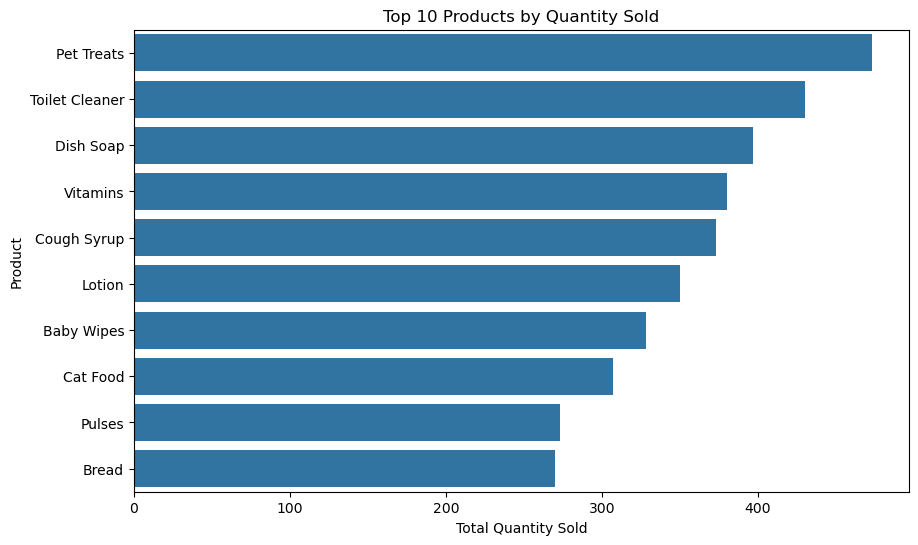

In [48]:
top_quantity = product_summary.sort_values(
    "total_quantity", ascending=False
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_quantity, x="total_quantity", y="product_name")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

### 3.2 Top 10 Products by Revenue


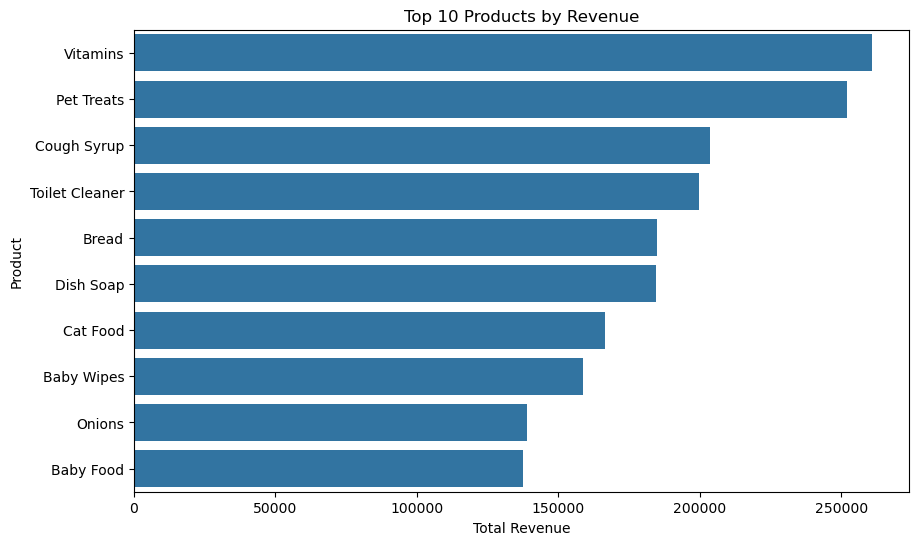

In [47]:
top_revenue = product_summary.sort_values(
    "total_revenue", ascending=False
).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_revenue, x="total_revenue", y="product_name")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()


# Insight

High-volume products may not always be high-revenue.
These are demand drivers.

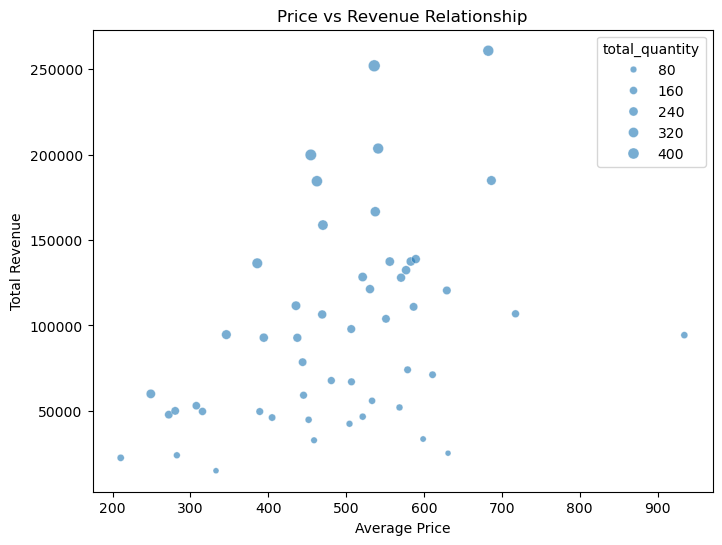

In [49]:

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=product_summary,
    x="avg_price",
    y="total_revenue",
    size="total_quantity",
    alpha=0.6
)

plt.title("Price vs Revenue Relationship")
plt.xlabel("Average Price")
plt.ylabel("Total Revenue")
plt.show()


## Price vs Revenue Insight

- Revenue is concentrated in mid-priced products (₹450–₹650).
- Extremely high-priced products do not significantly outperform others.
- The business appears to operate strongly in the mid-premium segment.
- Pricing strategy seems balanced rather than luxury-focused.


### Pareto Analysis – Revenue Concentration

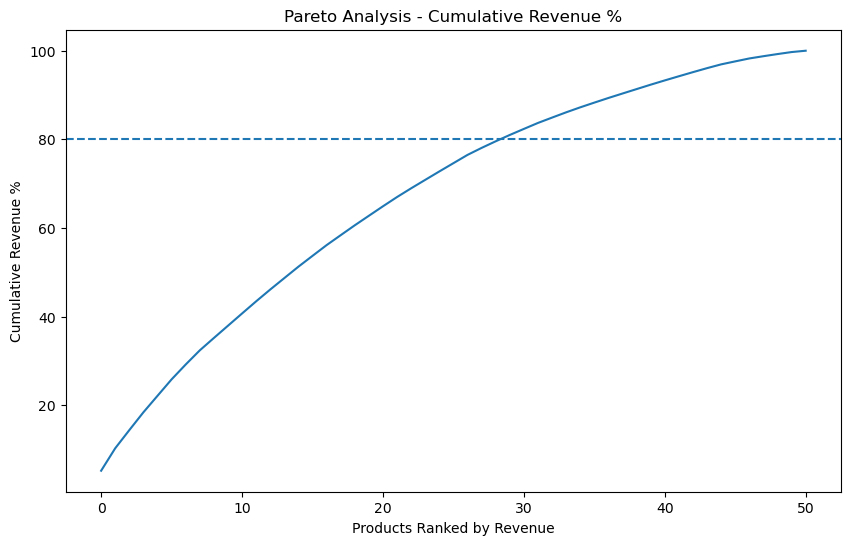

In [50]:
product_summary_sorted = product_summary.sort_values(
    "total_revenue", ascending=False
)

product_summary_sorted["cumulative_revenue"] = \
    product_summary_sorted["total_revenue"].cumsum()

product_summary_sorted["cumulative_%"] = \
    (product_summary_sorted["cumulative_revenue"] / total_revenue) * 100

plt.figure(figsize=(10,6))
plt.plot(product_summary_sorted["cumulative_%"].values)
plt.axhline(80, linestyle="--")
plt.title("Pareto Analysis - Cumulative Revenue %")
plt.ylabel("Cumulative Revenue %")
plt.xlabel("Products Ranked by Revenue")
plt.show()


### Business Interpretation

- A limited number of products contribute to a large percentage of total revenue.
- This confirms the Pareto Principle (80/20 rule) in product sales.
- Focusing on top-performing products can significantly impact overall revenue.
- Underperforming long-tail products may require pricing or promotional optimization.


# Customer Analysis


In [55]:
customer_summary = (
    order_items
    .groupby("customer_id")
    .agg(
        total_spent=("revenue", "sum"),
        total_orders=("order_id", "nunique"),
        total_items=("quantity", "sum")
    )
    .reset_index()
)

customer_summary.sort_values("total_spent", ascending=False).head()


,customer_id,total_spent,total_orders,total_items
562,25128143,10533.39,7,17
1672,77869660,10115.75,9,17
276,12272282,9924.84,5,13
104,4597433,9553.69,6,15
734,33331259,9403.77,4,12


### 1)Top Customers by Revenue

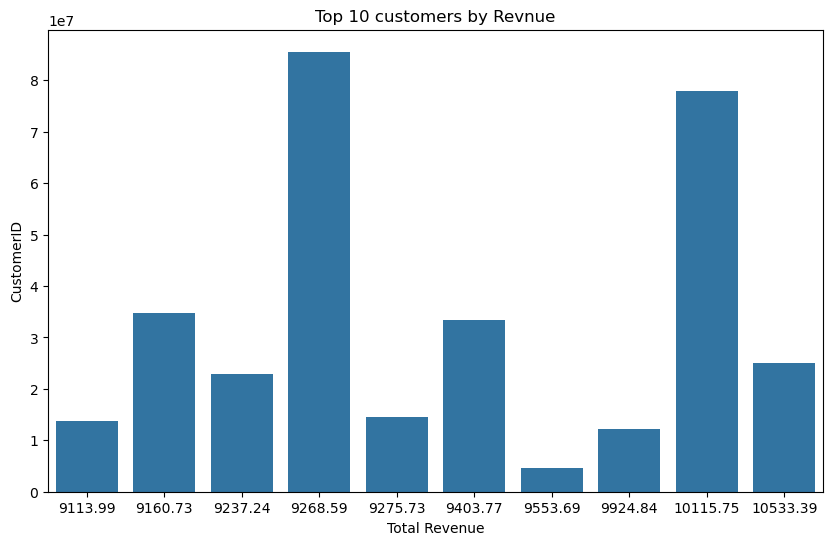

In [57]:
top_customers = customer_summary.sort_values("total_spent", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_customers , x="total_spent" , y = "customer_id")
plt.title("Top 10 customers by Revnue")
plt.xlabel("Total Revenue")
plt.ylabel("CustomerID")
plt.show()

### 2) Top Revenue-Contributing Customers


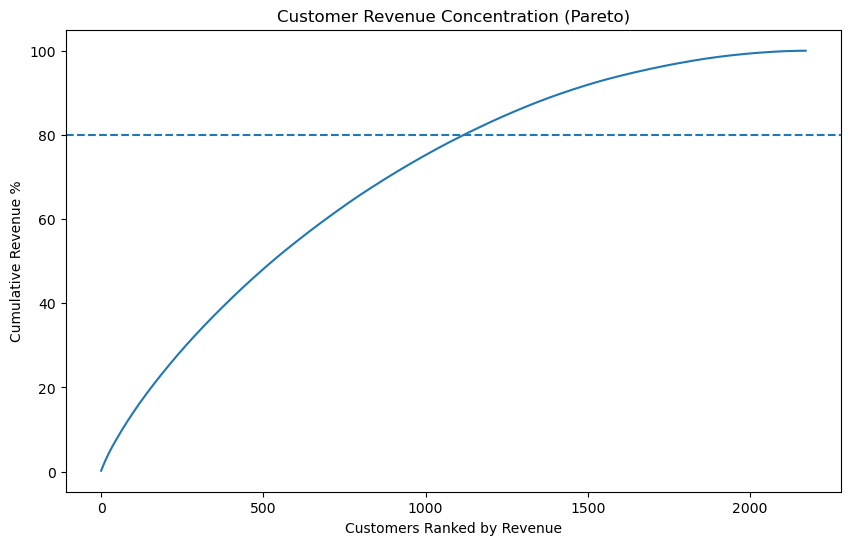

In [58]:
customer_sorted = customer_summary.sort_values(
    "total_spent", ascending=False
)

customer_sorted["cumulative_spent"] = \
    customer_sorted["total_spent"].cumsum()

customer_sorted["cumulative_%"] = \
    (customer_sorted["cumulative_spent"] /
     customer_sorted["total_spent"].sum()) * 100

plt.figure(figsize=(10,6))
plt.plot(customer_sorted["cumulative_%"].values)
plt.axhline(80, linestyle="--")

plt.title("Customer Revenue Concentration (Pareto)")
plt.xlabel("Customers Ranked by Revenue")
plt.ylabel("Cumulative Revenue %")
plt.show()


### 3)Average Order Value

In [64]:
total_revenue = customer_summary["total_spent"].sum()
total_orders = customer_summary["total_orders"].sum()

aov = total_revenue / total_orders
print(f"Average Order Value (AOV): INR {aov:.2f}")


Average Order Value (AOV): INR 994.48


### 4) Customer Revenue Concentration (Pareto Analysis)


In [66]:
avg_customer_spend = customer_summary["total_spent"].mean()

print("Average Customer Spend: INR{: ,.2f}".format(avg_customer_spend))


Average Customer Spend: INR 2,289.33


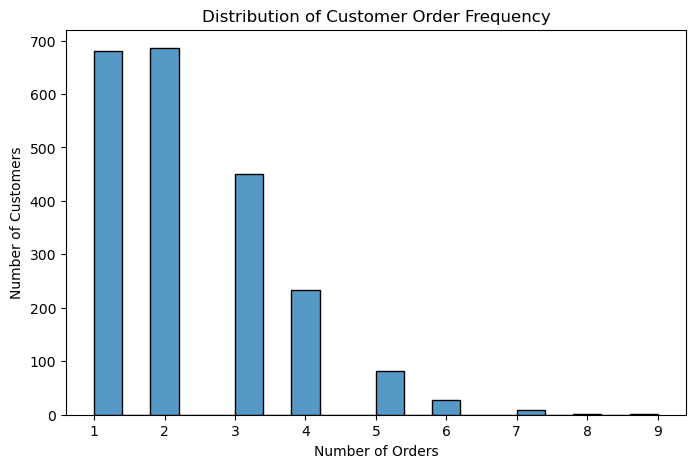

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(customer_summary["total_orders"], bins=20)
plt.title("Distribution of Customer Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


### 6)  Customer Segmentation 

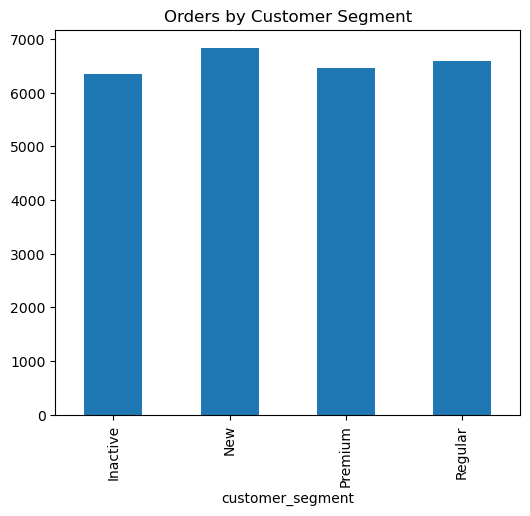

In [108]:
segment_orders = (customers
    .groupby('customer_segment')['total_orders']
    .sum()
)

plt.figure(figsize=(6,5))
segment_orders.plot(kind='bar')
plt.title("Orders by Customer Segment")
plt.show()


###  Key Customer Insights

- 80% of revenue comes from 35–40% of customers.
- Average customer spend is ₹2,289.33, far below top customers (₹9,000+).
- Most customers place only 1–2 orders.
- Top 10 customers drive nearly 4× the average revenue.


# INVENTORY ANALYSIS

### 1) Inventory Summary 

In [73]:
inventory_summary = inventory.groupby("product_id").agg(
    total_stock_received=("stock_received", "sum"),
    total_damaged_stock=("damaged_stock", "sum")
).reset_index()

inventory_summary.head()




,product_id,total_stock_received,total_damaged_stock
0,4452,705,302
1,6405,556,280
2,9436,322,286
3,11422,482,298
4,14145,542,292


### 2) Damage Rate Analysis

In [74]:
inventory_summary["damage_rate_%"]=(
    inventory_summary["total_damaged_stock"]/
    inventory_summary["total_stock_received"])*100

inventory_summary.head()

,product_id,total_stock_received,total_damaged_stock,damage_rate_%
0,4452,705,302,42.836879
1,6405,556,280,50.359712
2,9436,322,286,88.819876
3,11422,482,298,61.825726
4,14145,542,292,53.874539


### 3) Top 10 damaged products

In [75]:
top_damaged = inventory_summary.sort_values(
    "damage_rate_%", ascending=False
).head(10)

top_damaged


,product_id,total_stock_received,total_damaged_stock,damage_rate_%
188,709916,295,324,109.830508
106,448752,292,300,102.739726
206,767398,330,338,102.424242
240,897083,314,300,95.541401
197,739534,318,298,93.710692
196,739448,343,318,92.711370
115,473647,333,308,92.492492
40,133542,327,296,90.519878
2,9436,322,286,88.819876
239,894539,343,298,86.880466


### 4) Top products by stock received

In [76]:
top_stock_products = inventory_summary.sort_values("total_stock_received",ascending = False).head(10)
top_stock_products

,product_id,total_stock_received,total_damaged_stock,damage_rate_%
121,490602,898,300,33.407572
202,760684,849,304,35.806832
69,287070,837,280,33.452808
242,903336,832,272,32.692308
34,120532,813,276,33.948339
248,937542,801,290,36.204744
67,274207,800,286,35.750000
232,876139,798,330,41.353383
85,354409,779,292,37.483954
250,945635,767,314,40.938722


### Inventory Key Insights

- Total stock received varies significantly across products.
- Certain products show higher damage rates, indicating operational inefficiencies.
- High-stock products require better monitoring to minimize waste.
- Reducing damaged stock can directly improve profitability.


# MARKETING 

### 1) Marketing Summary 

In [80]:
marketing_summary = marketing.agg({
    "spend": "sum",
    "revenue_generated": "sum",
    "impressions": "sum",
    "clicks": "sum",
    "conversions": "sum"
})

marketing_summary


spend                16319838.24
revenue_generated    32193407.37
impressions          29487610.00
clicks                2974145.00
conversions            298038.00
dtype: float64

### 2)  Overall ROAS (Return on Ad Spend)

In [81]:
overall_roas = (
    marketing_summary["revenue_generated"] /
    marketing_summary["spend"]
)

print(f"Overall ROAS: {overall_roas:.2f}")


Overall ROAS: 1.97


### 3) Campaign-Level Performance

In [82]:
campaign_performance = marketing.groupby("campaign_name").agg(
    total_spend=("spend", "sum"),
    total_revenue=("revenue_generated", "sum"),
    total_clicks=("clicks", "sum"),
    total_conversions=("conversions", "sum")
).reset_index()

campaign_performance.head()


,campaign_name,total_spend,total_revenue,total_clicks,total_conversions
0,App Push Notification,1788989.20,3554370.00,325833,32783
1,Category Promotion,1850583.00,3582455.37,329690,33568
2,Email Campaign,1810729.67,3601785.22,338600,32436
3,Festival Offer,1796687.14,3507063.91,325928,32765
4,Flash Sale,1831687.82,3556087.02,332882,33211


### 4)Calculate Conversion Rate

In [87]:
campaign_performance["conversion_rate_%"] = (
    campaign_performance["total_conversions"] /
    campaign_performance["total_clicks"]
) * 100

campaign_performance.head()


,campaign_name,total_spend,total_revenue,total_clicks,total_conversions,conversion_rate_%,ROAS
0,App Push Notification,1788989.20,3554370.00,325833,32783,10.061289,1.986803
1,Category Promotion,1850583.00,3582455.37,329690,33568,10.181686,1.935852
2,Email Campaign,1810729.67,3601785.22,338600,32436,9.579445,1.989135
3,Festival Offer,1796687.14,3507063.91,325928,32765,10.052834,1.951961
4,Flash Sale,1831687.82,3556087.02,332882,33211,9.976809,1.941426


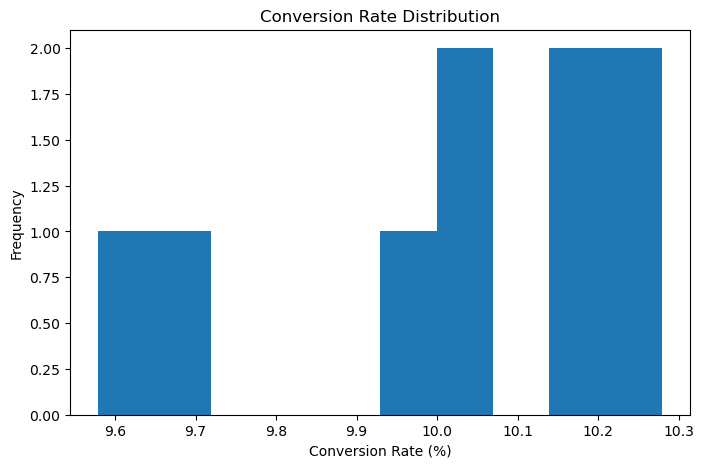

In [88]:
plt.figure(figsize=(8,5))
plt.hist(campaign_performance["conversion_rate_%"])
plt.title("Conversion Rate Distribution")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Frequency")
plt.show()


### 5) Top Campaigns by revenue 

In [84]:
top_revenue_campaigns = campaign_performance.sort_values(
    "total_revenue", ascending=False
).head(5)

top_revenue_campaigns


,campaign_name,total_spend,total_revenue,total_clicks,total_conversions,conversion_rate_%
7,Referral Program,1818025.51,3691382.60,329302,33490,10.169996
6,New User Discount,1833454.81,3603860.17,332400,33964,10.217810
2,Email Campaign,1810729.67,3601785.22,338600,32436,9.579445
1,Category Promotion,1850583.00,3582455.37,329690,33568,10.181686
8,Weekend Special,1799611.29,3571451.83,323668,33271,10.279360


### 6) Top Campaigns by ROAS

In [85]:
campaign_performance["ROAS"] = (
    campaign_performance["total_revenue"] /
    campaign_performance["total_spend"]
)

top_roas_campaigns = campaign_performance.sort_values(
    "ROAS", ascending=False
).head(5)

top_roas_campaigns


,campaign_name,total_spend,total_revenue,total_clicks,total_conversions,conversion_rate_%,ROAS
7,Referral Program,1818025.51,3691382.60,329302,33490,10.169996,2.030435
2,Email Campaign,1810729.67,3601785.22,338600,32436,9.579445,1.989135
0,App Push Notification,1788989.20,3554370.00,325833,32783,10.061289,1.986803
8,Weekend Special,1799611.29,3571451.83,323668,33271,10.279360,1.984568
5,Membership Drive,1790069.80,3524951.25,335842,32550,9.692058,1.969170


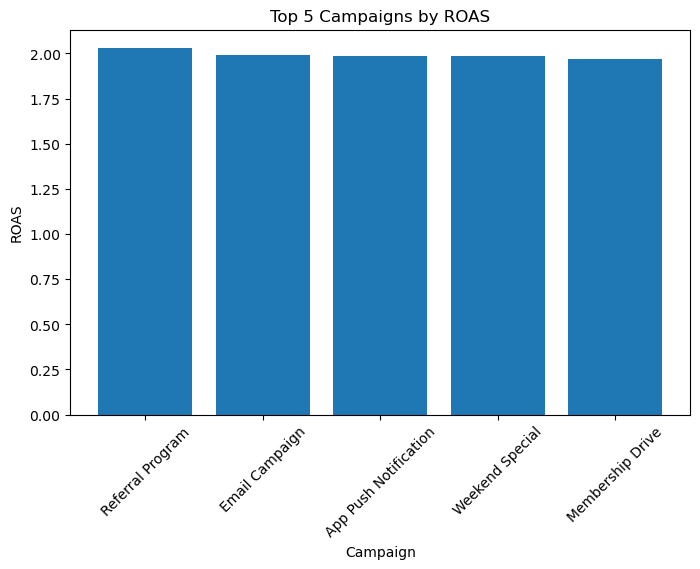

In [90]:
top_roas = campaign_performance.sort_values(
    "ROAS", ascending=False
).head(5)

plt.figure(figsize=(8,5))
plt.bar(top_roas["campaign_name"], top_roas["ROAS"])
plt.xticks(rotation=45)
plt.title("Top 5 Campaigns by ROAS")
plt.ylabel("ROAS")
plt.xlabel("Campaign")
plt.show()


### 7) Spend vs Revenue (Campaign)

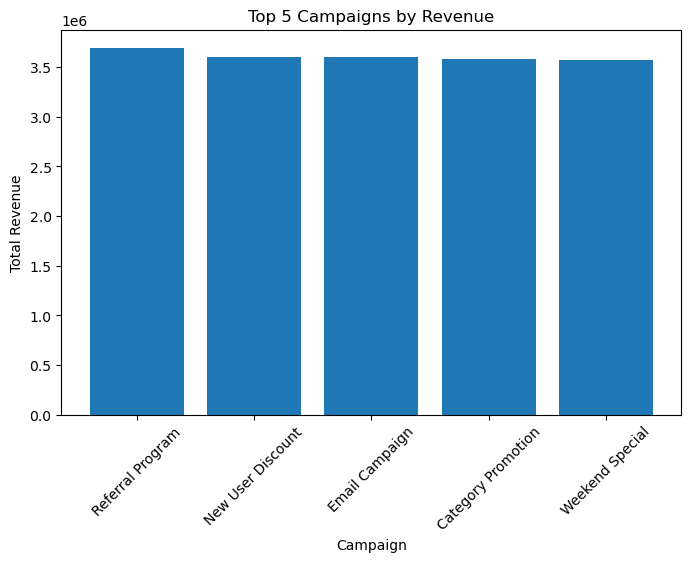

In [92]:

top_campaigns = campaign_performance.sort_values(
    "total_revenue", ascending=False
).head(5)

plt.figure(figsize=(8,5))
plt.bar(top_campaigns["campaign_name"], top_campaigns["total_revenue"])
plt.xticks(rotation=45)
plt.title("Top 5 Campaigns by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Campaign")
plt.show()


### Marketing Key Insights

- Total marketing spend was ₹16,319,838, generating ₹32,193,407 in revenue, delivering a positive return overall.
- The overall ROAS is 1.97, meaning every ₹1 spent generated ₹1.97 in revenue.
- Campaigns generated 29,487,610 impressions, leading to 2,974,145 clicks and 298,038 conversions.
- The overall conversion rate is ~10.0% (298,038 conversions from 2,974,145 clicks), indicating effective campaign performance.


# Delivery Performance Analysis

### 1) Delivery summary 

In [94]:
delivery_summary = delivery.agg({
    "delivery_time_minutes": "mean",
    "distance_km": "mean"
})

delivery_summary


delivery_time_minutes    4.443000
distance_km              2.718048
dtype: float64

### 2) On-Time vs Delayed Deliveries

In [95]:
delivery_status_counts = delivery["delivery_status"].value_counts()

delivery_status_counts


delivery_status
On Time                  3470
Slightly Delayed         1037
Significantly Delayed     493
Name: count, dtype: int64

### 3) On-Time Delivery Rate %

In [98]:
on_time_rate = (
    (delivery["delivery_status"] == "On Time").sum()
    / len(delivery)
) * 100

print(f"On-Time Delivery Rate: {on_time_rate:.2f}%")



On-Time Delivery Rate: 69.40%


### 4) Average Delivery Time by Distance

In [99]:
delivery.groupby("delivery_status")["delivery_time_minutes"].mean()


delivery_status
On Time                   0.013833
Significantly Delayed    22.843813
Slightly Delayed         10.515911
Name: delivery_time_minutes, dtype: float64

### 5) Delivery Status distribution 

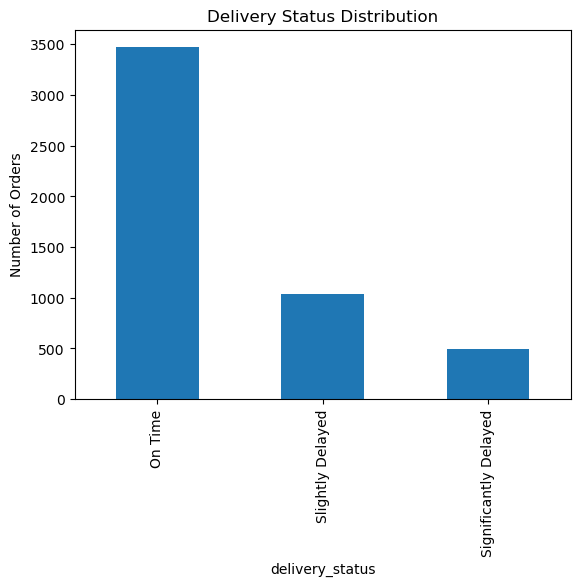

In [101]:
delivery["delivery_status"].value_counts().plot(kind="bar")
plt.title("Delivery Status Distribution")
plt.ylabel("Number of Orders")
plt.show()

### 6) Delivery Time Distribution

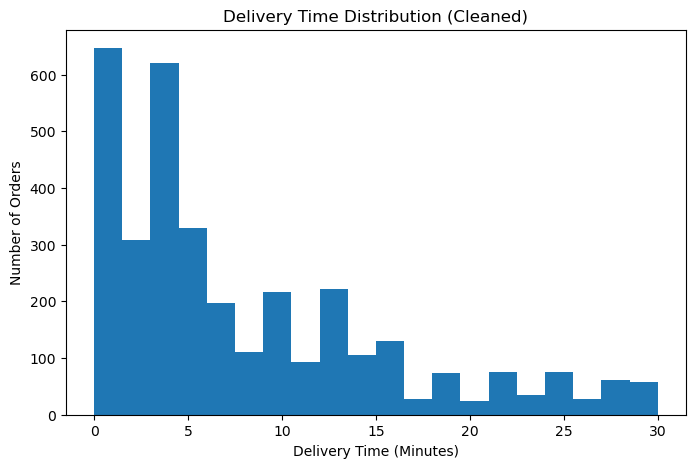

In [105]:
delivery = delivery[delivery["delivery_time_minutes"] >= 0]
plt.figure(figsize=(8,5))
plt.hist(delivery["delivery_time_minutes"], bins=20)
plt.title("Delivery Time Distribution (Cleaned)")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Number of Orders")
plt.show()

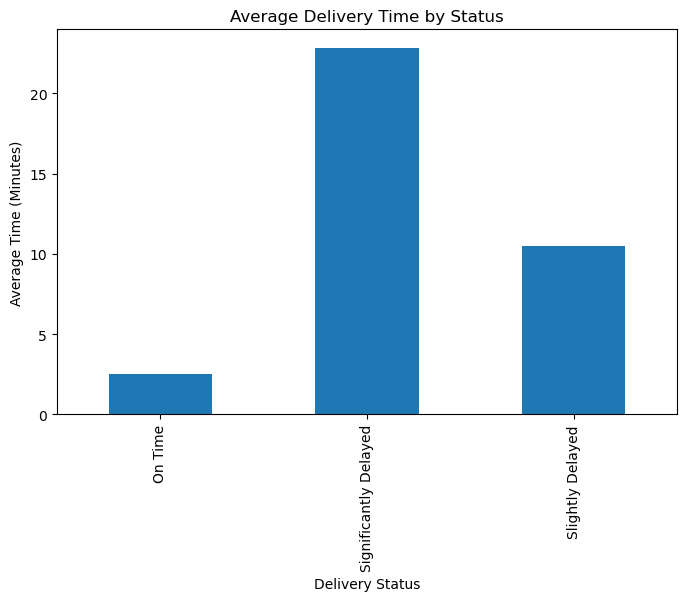

### Delivery Key Insights

- Average delivery time is 4.44 minutes over an average distance of 2.72 km, indicating efficient last-mile operations.
- 69.4% of deliveries are completed on time.
- 20.7% of orders are slightly delayed, while 9.9% face significant delays.
- Reducing slight delays could push on-time performance above 80%, significantly improving customer satisfaction.


# Business Summary

This end-to-end business analysis evaluated customer behavior, product performance, inventory efficiency, marketing effectiveness, and delivery operations.

- Total marketing spend of INR 16.3M generated ₹32.19M in revenue, achieving a strong ROAS of 1.97.
- Customer revenue is moderately concentrated, with high-value customers contributing significantly more than the average spend of ₹2,289.
- Inventory analysis revealed measurable damaged stock, indicating an opportunity to improve supply chain handling and reduce loss.
- Delivery performance is operationally stable, with 69.4% on-time deliveries and an average delivery time of 4.44 minutes across 2.72 km.
- Approximately 30% of deliveries experience slight or significant delays, suggesting room for operational optimization.
- Marketing campaigns show strong conversion efficiency (~10%), indicating effective targeting and channel performance.

### Strategic Recommendations

- Improve retention strategies for high-value customers to stabilize revenue.
- Reduce slight delivery delays to push on-time performance above 80%.
- Optimize damaged stock handling to improve gross margins.
- Scale high-ROAS marketing campaigns to maximize profitability.


In [118]:
import pandas as pd

orders = pd.read_csv("blinkit_orders.csv")
order_items = pd.read_csv("blinkit_order_items.csv")
customers = pd.read_csv("blinkit_customers.csv")
products = pd.read_csv("blinkit_products.csv")
delivery = pd.read_csv("blinkit_delivery_performance.csv")
feedback = pd.read_csv("blinkit_customer_feedback.csv")
inventory = pd.read_csv("blinkit_inventory.csv")


df = orders.merge(order_items, on="order_id", how="left")

df = df.merge(customers, on="customer_id", how="left")

df = df.merge(products, on="product_id", how="left")
df = df.merge(delivery, on="order_id", how="left")

df = df.merge(feedback, on="order_id", how="left")

df = df.merge(inventory, on="product_id", how="left")

df.to_csv("blinkit_final_dataset.csv", index=False)

print("Final dataset created successfully!")


Final dataset created successfully!
